In [79]:
import networkx as nx # https://networkx.org/
import matplotlib.pyplot as plt # https://matplotlib.org/
import numpy as np #https://numpy.org/
from pyvis.network import Network #https://pyviz.org/
from operator import itemgetter


### This is a network of the Kardashian-Jenner family, friends, romantic, and rumored relationships

In [80]:
G = nx.Graph() #this creates the graph 

#I was too lazy to add each node individually, so I just added them with the edges...There are better ways to do this
#Family 
G.add_edges_from([("*Kendall Jenner","*Kim Kardashian"),("*Kim Kardashian","*Rob Kardashian"),("*Kourtney Kardashian","*Rob Kardashian"),("*Khloé Kardashian","*Rob Kardashian"),("*Kourtney Kardashian","*Khloé Kardashian"),("*Kourtney Kardashian","*Kim Kardashian"),("*Kylie Jenner","*Kourtney Kardashian"),("*Kendall Jenner","*Kourtney Kardashian"),("*Kim Kardashian","*Khloé Kardashian"),("*Kendall Jenner","*Rob Kardashian"),("*Khloé Kardashian","*Kendall Jenner"),("*Khloé Kardashian","*Kylie Jenner"), ("*Kendall Jenner","*Kris Jenner"),("*Kim Kardashian","*Kris Jenner"),("*Kourtney Kardashian","*Kris Jenner"),("*Khloé Kardashian","*Kris Jenner"),("*Kris Jenner","*Rob Kardashian"),("*Kris Jenner","*Kylie Jenner")])

#General Knowledge
G.add_edges_from([("*Kendall Jenner","*Kylie Jenner"),("Jordyn Woods", "Devin Booker"),("*Kendall Jenner", "Jordyn Woods"), ("*Kendall Jenner","Devin Booker"), ("Justine Sky","*Kendall Jenner"), ("Justine Sky","*Kylie Jenner"),("Justine Sky","Travis scott"),("*Kylie Jenner","Travis scott"),("Tyga","Blac Chyna"),("Blac Chyna","*Kim Kardashian"),("*Kylie Jenner","*Kim Kardashian"),("*Kylie Jenner","Tyga"),("Blac Chyna","*Rob Kardashian"),("*Rob Kardashian","*Kylie Jenner"),("Sofia Richie","*Kylie Jenner"),("Jaden Smith","Sofia Richie"),("Jaden Smith","*Kylie Jenner"),("Sofia Richie","Scott Dissick"),("Scott Dissick","*Kourtney Kardashian"),("*Kourtney Kardashian","Justin Beiber"),("*Kendall Jenner","Justin Beiber"),("*Kendall Jenner","Hailey Bieber"),("Hailey Bieber","Justin Beiber"),("Amber Rose","Blac Chyna"),("Amber Rose","Kanye West"),("*Kim Kardashian","Kanye West"),("*Kim Kardashian","Travis Barker"),("*Kourtney Kardashian","Travis Barker"),("Travis Barker","MGK"),("MGK","Megan Fox"),("MGK","Amber Rose"),("MGK","Pete Davidson"),("Ariana Grande","Pete Davidson"),("Pete Davidson", "Kaia Gerber"),("Kaia Gerber", "*Kendall Jenner"),("Pete Davidson","*Kim Kardashian"),("*Kim Kardashian","The Game"),("*Khloé Kardashian","The Game"),("Tyga","Jordan Craig"),("Tristan Thompson","Jordan Craig"),("*Khloé Kardashian","Tristan Thompson"),("*Kim Kardashian","Larsa Pippen"),("Larsa Pippen","Tristan Thompson"),("Tristan Thompson","Jordyn Woods")])

#Kim
G.add_edges_from([("*Kim Kardashian","Damon Thomas"), ("*Kim Kardashian","Ray J"), ("*Kim Kardashian","Nick Lachey"),("*Kim Kardashian","Nick Cannon"),("*Kim Kardashian","Reggie Bush"),("*Kim Kardashian","Cristiano Ronaldo"),("*Kim Kardashian","Miles Austin"),("*Kim Kardashian","Michael Copon"),("*Kim Kardashian","John Mayer"),("*Kim Kardashian","Gabriel Aubrey"),("*Kim Kardashian","Kris Humphries")])

#Kourtney
G.add_edges_from([("*Kourtney Kardashian","Younes Bendjima")])

#"*Khloé Kardashian"
G.add_edges_from([("*Khloé Kardashian","James Harden"),("*Khloé Kardashian","French Montana"),("*Khloé Kardashian","Matt Kemp"),("*Khloé Kardashian","Lamar Odom"),("*Khloé Kardashian","Derrick Ward")])

#Kendall, Kylie, etc
G.add_edges_from([("*Kendall Jenner","Ben Simmons"),("*Kendall Jenner","Anwar Hadid"),("*Kendall Jenner","Harry Styles"),("*Kylie Jenner","Drake"),("James Harden","Travis scott"), ("Larsa Pippen", "Future"),("Future", "Ciara"),("Ciara", "*Kim Kardashian"),("*Khloé Kardashian", "Trina"),("Trina","James Harden"),("Trina","French Montana") ])

#edits from Reddit

G.add_edges_from([("Future","Blac Chyna"),("Travis scott", "Kanye West"),("Future","Kanye West"),("Drake","Travis scott"),("Drake","Kanye West"),("Drake","Future")])

#Kris jenner 
G.add_edges_from([("*Kris Jenner","Corey Gamble"),("*Kris Jenner","Caitlyn Jenner"),("*Kris Jenner","Todd Waterman"),("*Kris Jenner","Robert Kardashian"),("*Kris Jenner","Alfred M. Garcia"),("*Kris Jenner","Cesar Sanudo"),("*Kris Jenner","OJ Simpson")])
    
    

In [81]:
#Adding attributes to the edges and colors for later use 
# weight 1 == family
# weight 2 == friend 
# weight 3 == Confirmed relationship/hookup/marriage/fling
# weight 4 == Rumor 

family = '#324A51'
friend = '#E4A5B7'
confirmed_rel = '#9DBF94'
rumor = '#FFE9D0'

G["*Kendall Jenner"]["*Kris Jenner"]['weight'] = 1
G["*Kendall Jenner"]["*Kris Jenner"]['color'] = family

G["*Kim Kardashian"]["*Kris Jenner"]['weight'] = 1
G["*Kim Kardashian"]["*Kris Jenner"]['color'] = family

G["*Kourtney Kardashian"]["*Kris Jenner"]['weight'] = 1
G["*Kourtney Kardashian"]["*Kris Jenner"]['color'] = family

G["*Khloé Kardashian"]["*Kris Jenner"]['weight'] = 1
G["*Khloé Kardashian"]["*Kris Jenner"]['color'] = family

G["*Kris Jenner"]["*Rob Kardashian"]['weight'] = 1
G["*Kris Jenner"]["*Rob Kardashian"]['color'] = family

G["*Kris Jenner"]["*Kylie Jenner"]['weight'] = 1
G["*Kris Jenner"]["*Kylie Jenner"]['color'] = family

G["*Kendall Jenner"]["*Kim Kardashian"]['weight'] = 1
G["*Kendall Jenner"]["*Kim Kardashian"]['color'] = family

G["*Kim Kardashian"]["*Rob Kardashian"]['weight'] = 1
G["*Kim Kardashian"]["*Rob Kardashian"]['color'] = family

G["*Kourtney Kardashian"]["*Rob Kardashian"]['weight'] = 1
G["*Kourtney Kardashian"]["*Rob Kardashian"]['color'] = family

G["*Khloé Kardashian"]["*Rob Kardashian"]['weight'] = 1
G["*Khloé Kardashian"]["*Rob Kardashian"]['color'] = family

G["*Kourtney Kardashian"]["*Khloé Kardashian"]['weight'] = 1
G["*Kourtney Kardashian"]["*Khloé Kardashian"]['color'] = family

G["*Kourtney Kardashian"]["*Kim Kardashian"]['weight'] = 1
G["*Kourtney Kardashian"]["*Kim Kardashian"]['color'] = family

G["*Kylie Jenner"]["*Kourtney Kardashian"]['weight'] = 1
G["*Kylie Jenner"]["*Kourtney Kardashian"]['color'] = family

G["*Kendall Jenner"]["*Kourtney Kardashian"]['weight'] = 1
G["*Kendall Jenner"]["*Kourtney Kardashian"]['color'] = family

G["*Kim Kardashian"]["*Khloé Kardashian"]['weight'] = 1
G["*Kim Kardashian"]["*Khloé Kardashian"]['color'] = family

G["*Kendall Jenner"]["*Rob Kardashian"]['weight'] = 1
G["*Kendall Jenner"]["*Rob Kardashian"]['color'] = family

G["*Khloé Kardashian"]["*Kendall Jenner"]['weight'] = 1
G["*Khloé Kardashian"]["*Kendall Jenner"]['color'] = family

G["*Khloé Kardashian"]["*Kylie Jenner"]['weight'] = 1
G["*Khloé Kardashian"]["*Kylie Jenner"]['color'] = family

G["*Kendall Jenner"]["*Kylie Jenner"]['weight'] = 1
G["*Kendall Jenner"]["*Kylie Jenner"]['color'] = family

G["*Kylie Jenner"]["*Kim Kardashian"]['weight'] = 1
G["*Kylie Jenner"]["*Kim Kardashian"]['color'] = family

G["*Kylie Jenner"]["*Rob Kardashian"]['weight'] = 1
G["*Kylie Jenner"]["*Rob Kardashian"]['color'] = family

G["Jordyn Woods"]["Devin Booker"]['weight'] = 2
G["Jordyn Woods"]["Devin Booker"]['color'] = friend

G["*Kendall Jenner"]["Jordyn Woods"]['weight'] = 2
G["*Kendall Jenner"]["Jordyn Woods"]['color'] = friend

G["*Kendall Jenner"]["Devin Booker"]['weight'] = 3
G["*Kendall Jenner"]["Devin Booker"]['color'] = confirmed_rel

G["Justine Sky"]["*Kendall Jenner"]['weight'] = 2
G["Justine Sky"]["*Kendall Jenner"]['color'] = friend

G["Justine Sky"]["*Kylie Jenner"]['weight'] = 2
G["Justine Sky"]["*Kylie Jenner"]['color'] = friend

G["Justine Sky"]["Travis scott"]['weight'] = 4
G["Justine Sky"]["Travis scott"]['color'] = rumor

G["*Kylie Jenner"]["Travis scott"]['weight'] = 3
G["*Kylie Jenner"]["Travis scott"]['color'] = confirmed_rel

G["Tyga"]["Blac Chyna"]['weight'] = 3
G["Tyga"]["Blac Chyna"]['color'] = confirmed_rel

G["Blac Chyna"]["*Kim Kardashian"]['weight'] = 2
G["Blac Chyna"]["*Kim Kardashian"]['color'] = friend

G["*Kylie Jenner"]["Tyga"]['weight'] = 3
G["*Kylie Jenner"]["Tyga"]['color'] = confirmed_rel

G["Blac Chyna"]["*Rob Kardashian"]['weight'] = 3
G["Blac Chyna"]["*Rob Kardashian"]['color'] = confirmed_rel

G["Sofia Richie"]["*Kylie Jenner"]['weight'] = 2
G["Sofia Richie"]["*Kylie Jenner"]['color'] = friend

G["Jaden Smith"]["Sofia Richie"]['weight'] = 3
G["Jaden Smith"]["Sofia Richie"]['color'] = confirmed_rel

G["Jaden Smith"]["*Kylie Jenner"]['weight'] = 3
G["Jaden Smith"]["*Kylie Jenner"]['color'] = confirmed_rel

G["Sofia Richie"]["Scott Dissick"]['weight'] = 3
G["Sofia Richie"]["Scott Dissick"]['color'] = confirmed_rel

G["Scott Dissick"]["*Kourtney Kardashian"]['weight'] = 3
G["Scott Dissick"]["*Kourtney Kardashian"]['color'] = confirmed_rel

G["*Kourtney Kardashian"]["Justin Beiber"]['weight'] = 4
G["*Kourtney Kardashian"]["Justin Beiber"]['color'] = rumor

G["*Kendall Jenner"]["Justin Beiber"]['weight'] = 4
G["*Kendall Jenner"]["Justin Beiber"]['color'] = rumor

G["*Kendall Jenner"]["Hailey Bieber"]['weight'] = 2
G["*Kendall Jenner"]["Hailey Bieber"]['color'] = friend

G["Hailey Bieber"]["Justin Beiber"]['weight'] = 3
G["Hailey Bieber"]["Justin Beiber"]['color'] = confirmed_rel

G["Amber Rose"]["Blac Chyna"]['weight'] = 2
G["Amber Rose"]["Blac Chyna"]['color'] = friend

G["Amber Rose"]["Kanye West"]['weight'] = 3
G["Amber Rose"]["Kanye West"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Kanye West"]['weight'] = 3
G["*Kim Kardashian"]["Kanye West"]['color'] =confirmed_rel

G["*Kim Kardashian"]["Travis Barker"]['weight'] = 4
G["*Kim Kardashian"]["Travis Barker"]['color'] = rumor

G["*Kourtney Kardashian"]["Travis Barker"]['weight'] = 3
G["*Kourtney Kardashian"]["Travis Barker"]['color'] = confirmed_rel

G["Travis Barker"]["MGK"]['weight'] = 2
G["Travis Barker"]["MGK"]['color'] = friend

G["MGK"]["Megan Fox"]['weight'] = 3
G["MGK"]["Megan Fox"]['color'] = confirmed_rel

G["MGK"]["Amber Rose"]['weight'] = 3
G["MGK"]["Amber Rose"]['color'] = confirmed_rel

G["MGK"]["Pete Davidson"]['weight'] = 2
G["MGK"]["Pete Davidson"]['color'] = friend

G["Ariana Grande"]["Pete Davidson"]['weight'] = 3
G["Ariana Grande"]["Pete Davidson"]['color'] =confirmed_rel

G["Pete Davidson"]["Kaia Gerber"]['weight'] = 3
G["Pete Davidson"]["Kaia Gerber"]['color'] = confirmed_rel

G["Kaia Gerber"]["*Kendall Jenner"]['weight'] = 2
G["Kaia Gerber"]["*Kendall Jenner"]['color'] = friend

G["Pete Davidson"]["*Kim Kardashian"]['weight'] = 3
G["Pete Davidson"]["*Kim Kardashian"]['color'] = confirmed_rel

G["*Kim Kardashian"]["The Game"]['weight'] = 3
G["*Kim Kardashian"]["The Game"]['color'] = confirmed_rel

G["*Khloé Kardashian"]["The Game"]['weight'] = 4
G["*Khloé Kardashian"]["The Game"]['color'] = rumor

G["Tyga"]["Jordan Craig"]['weight'] = 3
G["Tyga"]["Jordan Craig"]['color'] = confirmed_rel

G["Tristan Thompson"]["Jordan Craig"]['weight'] = 3
G["Tristan Thompson"]["Jordan Craig"]['color'] = confirmed_rel

G["*Khloé Kardashian"]["Tristan Thompson"]['weight'] = 3
G["*Khloé Kardashian"]["Tristan Thompson"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Larsa Pippen"]['weight'] = 2
G["*Kim Kardashian"]["Larsa Pippen"]['color'] = friend

G["Larsa Pippen"]["Tristan Thompson"]['weight'] = 3
G["Larsa Pippen"]["Tristan Thompson"]['color'] = confirmed_rel

G["Tristan Thompson"]["Jordyn Woods"]['weight'] = 3
G["Tristan Thompson"]["Jordyn Woods"]['color'] = confirmed_rel

#Kim's relationships 
G["*Kim Kardashian"]["Damon Thomas"]['weight'] = 3
G["*Kim Kardashian"]["Damon Thomas"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Ray J"]['weight'] = 3
G["*Kim Kardashian"]["Ray J"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Nick Lachey"]['weight'] = 3
G["*Kim Kardashian"]["Nick Lachey"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Nick Cannon"]['weight'] = 3
G["*Kim Kardashian"]["Nick Cannon"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Reggie Bush"]['weight'] = 3
G["*Kim Kardashian"]["Reggie Bush"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Cristiano Ronaldo"]['weight'] = 3
G["*Kim Kardashian"]["Cristiano Ronaldo"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Miles Austin"]['weight'] = 3
G["*Kim Kardashian"]["Miles Austin"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Michael Copon"]['weight'] = 3
G["*Kim Kardashian"]["Michael Copon"]['color'] = confirmed_rel

G["*Kim Kardashian"]["John Mayer"]['weight'] = 4
G["*Kim Kardashian"]["John Mayer"]['color'] = rumor

G["*Kim Kardashian"]["Gabriel Aubrey"]['weight'] = 3
G["*Kim Kardashian"]["Gabriel Aubrey"]['color'] = confirmed_rel

G["*Kim Kardashian"]["Kris Humphries"]['weight'] = 3
G["*Kim Kardashian"]["Kris Humphries"]['color'] = confirmed_rel

#Everyone else 
G["*Kourtney Kardashian"]["Younes Bendjima"]['weight'] = 3
G["*Kourtney Kardashian"]["Younes Bendjima"]['color'] = confirmed_rel

#"*Khloé Kardashian"
G["*Khloé Kardashian"]["James Harden"]['weight'] = 3
G["*Khloé Kardashian"]["James Harden"]['color'] = confirmed_rel

G["*Khloé Kardashian"]["French Montana"]['weight'] = 3
G["*Khloé Kardashian"]["French Montana"]['color'] = confirmed_rel

G["*Khloé Kardashian"]["Matt Kemp"]['weight'] = 3
G["*Khloé Kardashian"]["Matt Kemp"]['color'] = confirmed_rel

G["*Khloé Kardashian"]["Lamar Odom"]['weight'] = 3
G["*Khloé Kardashian"]["Lamar Odom"]['color'] = confirmed_rel

G["*Khloé Kardashian"]["Derrick Ward"]['weight'] = 3
G["*Khloé Kardashian"]["Derrick Ward"]['color'] = confirmed_rel

#Kendall
G["*Kendall Jenner"]["Ben Simmons"]['weight'] = 3
G["*Kendall Jenner"]["Ben Simmons"]['color'] = confirmed_rel

G["*Kendall Jenner"]["Anwar Hadid"]['weight'] = 3
G["*Kendall Jenner"]["Anwar Hadid"]['color'] = confirmed_rel


G["*Kendall Jenner"]["Harry Styles"]['weight'] = 3
G["*Kendall Jenner"]["Harry Styles"]['color'] = confirmed_rel

#Kylie 
G["*Kylie Jenner"]["Drake"]['weight'] = 4
G["*Kylie Jenner"]["Drake"]['color'] = rumor

G["James Harden"]["Travis scott"]['weight'] = 2
G["James Harden"]["Travis scott"]['color'] = friend

G["Kanye West"]["Travis scott"]['weight'] = 2
G["Kanye West"]["Travis scott"]['color'] = friend


G["Future"]["Kanye West"]['weight'] = 2
G["Future"]["Kanye West"]['color'] = friend

G["Drake"]["Travis scott"]['weight'] = 2
G["Drake"]["Travis scott"]['color'] = friend

G["Drake"]["Kanye West"]['weight'] = 2
G["Drake"]["Kanye West"]['color'] = friend

G["Drake"]["Future"]['weight'] = 2
G["Drake"]["Future"]['color'] = friend


G["Larsa Pippen"]["Future"]['weight'] = 3
G["Larsa Pippen"]["Future"]['color'] = confirmed_rel

G["Future"]["Ciara"]['weight'] = 3
G["Future"]["Ciara"]['color'] = confirmed_rel

G["Ciara"]["*Kim Kardashian"]['weight'] = 2
G["Ciara"]["*Kim Kardashian"]['color'] = friend

G["*Khloé Kardashian"]["Trina"]['weight'] = 2
G["*Khloé Kardashian"]["Trina"]['color'] = friend

G["Trina"]["James Harden"]['weight'] = 3
G["Trina"]["James Harden"]['color'] = confirmed_rel

G["Trina"]["French Montana"]['weight'] = 3
G["Trina"]["French Montana"]['color'] = confirmed_rel

G["Future"]["Blac Chyna"]['weight'] = 3
G["Future"]["Blac Chyna"]['color'] = confirmed_rel

G["*Kris Jenner"]["Corey Gamble"]['weight'] = 3
G["*Kris Jenner"]["Corey Gamble"]['color'] = confirmed_rel

G["*Kris Jenner"]["Caitlyn Jenner"]['weight'] = 3
G["*Kris Jenner"]["Caitlyn Jenner"]['color'] = confirmed_rel

G["*Kris Jenner"]["Todd Waterman"]['weight'] = 4
G["*Kris Jenner"]["Todd Waterman"]['color'] = rumor

G["*Kris Jenner"]["Robert Kardashian"]['weight'] = 3
G["*Kris Jenner"]["Robert Kardashian"]['color'] = confirmed_rel

G["*Kris Jenner"]["Alfred M. Garcia"]['weight'] = 3
G["*Kris Jenner"]["Alfred M. Garcia"]['color'] = confirmed_rel

G["*Kris Jenner"]["Cesar Sanudo"]['weight'] = 3
G["*Kris Jenner"]["Cesar Sanudo"]['color'] = confirmed_rel

G["*Kris Jenner"]["OJ Simpson"]['weight'] = 4
G["*Kris Jenner"]["OJ Simpson"]['color'] = rumor


In [82]:
G.number_of_nodes()
#gives the number of nodes

61

In [83]:
G.number_of_edges()
#number of edges in the graph

103

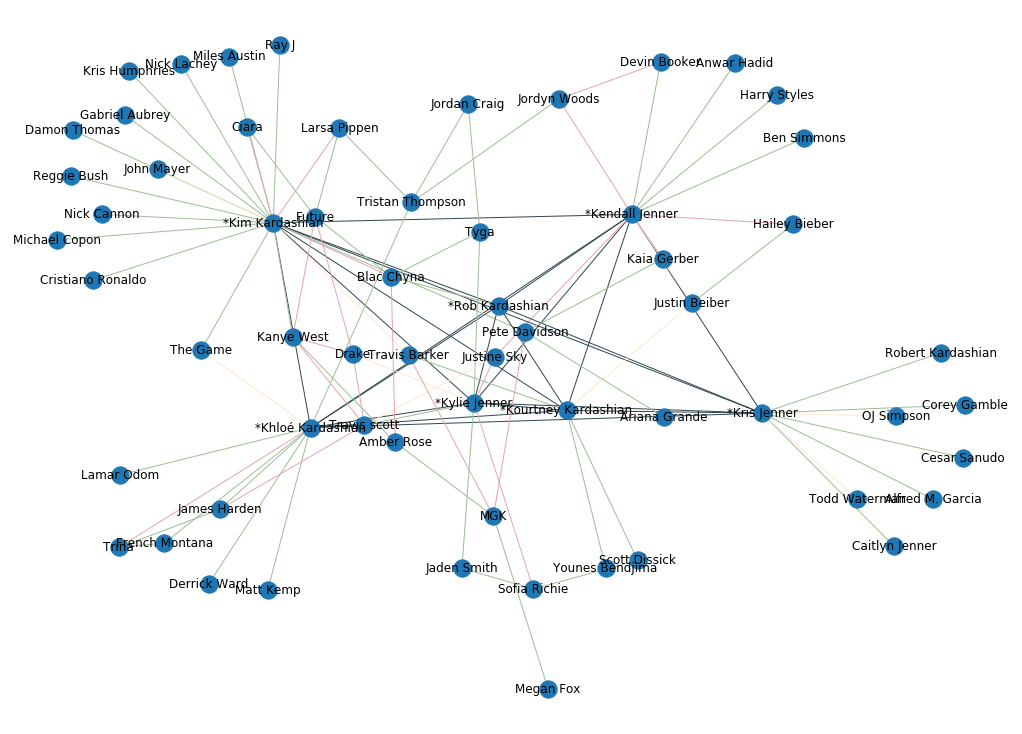

In [84]:
plt.show()
options = {
    'with_labels': 'True',
       'edge_color': list(nx.get_edge_attributes(G,'color').values())
}
nx.draw(G,**options)
#Very basic way to visualize using just networkx

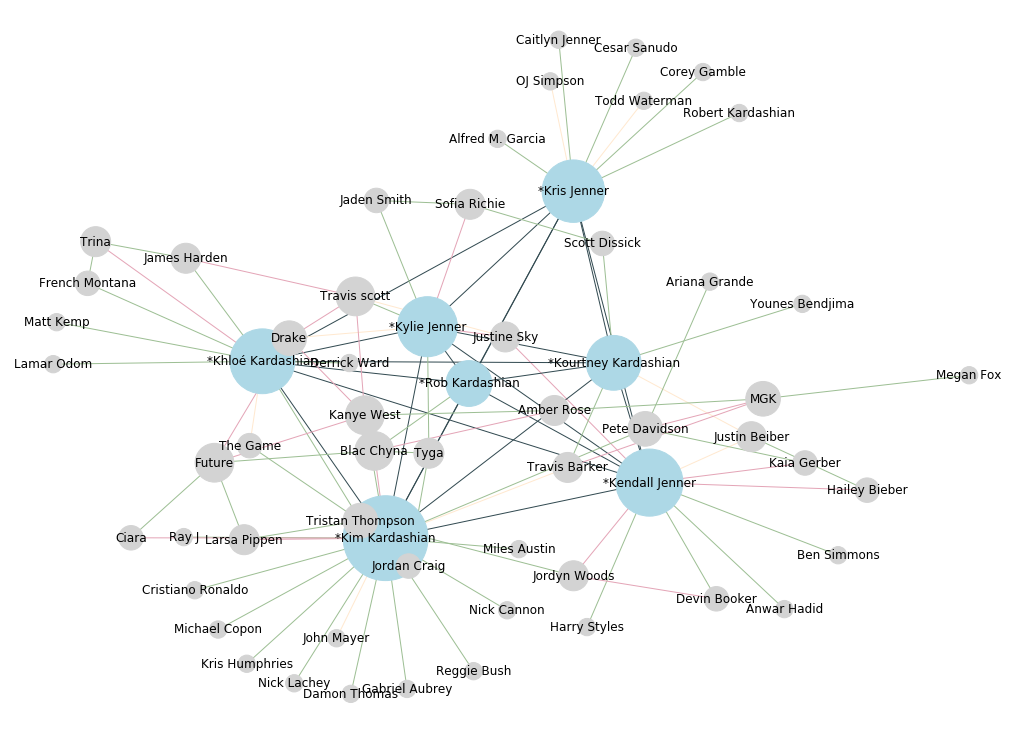

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
pos = nx.spring_layout(G, scale=20, k=3/np.sqrt(G.order()))
colors = [['lightgrey', 'lightblue'][node.startswith('*')] 
          for node in G.nodes()]
colores = list(nx.get_edge_attributes(G,'color').values())
d = dict(G.degree)
nx.draw(G, pos, node_color=colors, edge_color=colores,
        with_labels=True, 
        nodelist=d, 
        node_size=[d[k]*300 for k in d])

#tried using pylab, but it looked ugly to me

In [86]:
net=Network(notebook=True)
net.from_nx(G)
net.show("example.html")

#settled on Pyviz

# Analysis 

### this is just a simple network analysis of the graph....

In [87]:
#How connected it is from 0-1
density = nx.density(G)
print("Network density:", density)

Network density: 0.05628415300546448


In [88]:
#Measure of the two most distant nodes 
nx.diameter(G)

5

In [89]:
# Measure of triangles...So if a and b both know c then a and b must know of each other
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.18726114649681527


In [90]:
# Checking the centrality of nodes --README has more info
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('*Kim Kardashian', 24)
('*Kendall Jenner', 15)
('*Khloé Kardashian', 14)
('*Kris Jenner', 13)
('*Kylie Jenner', 12)
('*Kourtney Kardashian', 10)
('*Rob Kardashian', 7)
('Travis scott', 5)
('Blac Chyna', 5)
('Kanye West', 5)
('Future', 5)
('MGK', 4)
('Pete Davidson', 4)
('Tristan Thompson', 4)
('Drake', 4)
('Jordyn Woods', 3)
('Justine Sky', 3)
('Tyga', 3)
('Sofia Richie', 3)
('Justin Beiber', 3)


In [91]:
#Checking the betweenes centrality of node
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('*Kim Kardashian', 0.5073894717962517)
('*Kendall Jenner', 0.22984126984126985)
('*Kris Jenner', 0.2214689265536723)
('*Khloé Kardashian', 0.21686283741368492)
('*Kylie Jenner', 0.14413326159088874)
('*Kourtney Kardashian', 0.09620258272800651)
('Pete Davidson', 0.06021657250470807)
('MGK', 0.036803874092009685)
('Blac Chyna', 0.03581091381938839)
('Travis Barker', 0.03283965563626579)
('Kanye West', 0.030467895256030858)
('Tristan Thompson', 0.02353197022688548)
('Tyga', 0.016987489911218727)
('*Rob Kardashian', 0.015554434579858308)
('Larsa Pippen', 0.014991480584700914)
('Amber Rose', 0.009041789973993363)
('Travis scott', 0.008192090395480226)
('Kaia Gerber', 0.006770244821092279)
('Drake', 0.00633844498251278)
('Future', 0.006238005560039459)


In [92]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)
# same thing as before just printed with the degree

Name: *Kim Kardashian | Betweenness Centrality: 0.5073894717962517 | Degree: 24
Name: *Kendall Jenner | Betweenness Centrality: 0.22984126984126985 | Degree: 15
Name: *Kris Jenner | Betweenness Centrality: 0.2214689265536723 | Degree: 13
Name: *Khloé Kardashian | Betweenness Centrality: 0.21686283741368492 | Degree: 14
Name: *Kylie Jenner | Betweenness Centrality: 0.14413326159088874 | Degree: 12
Name: *Kourtney Kardashian | Betweenness Centrality: 0.09620258272800651 | Degree: 10
Name: Pete Davidson | Betweenness Centrality: 0.06021657250470807 | Degree: 4
Name: MGK | Betweenness Centrality: 0.036803874092009685 | Degree: 4
Name: Blac Chyna | Betweenness Centrality: 0.03581091381938839 | Degree: 5
Name: Travis Barker | Betweenness Centrality: 0.03283965563626579 | Degree: 3
Name: Kanye West | Betweenness Centrality: 0.030467895256030858 | Degree: 5
Name: Tristan Thompson | Betweenness Centrality: 0.02353197022688548 | Degree: 4
Name: Tyga | Betweenness Centrality: 0.016987489911218727

In [93]:
#Doing fun community analysis
communities = nx.community.greedy_modularity_communities(G)
modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

# Now you can add modularity information like we did the other metrics
nx.set_node_attributes(G, modularity_dict, 'modularity')

# First get a list of just the nodes in that class
class0 = [n for n in G.nodes() if G.nodes[n]['modularity'] == 0]

# Then create a dictionary of the eigenvector centralities of those nodes
class0_eigenvector = {n:G.nodes[n]['eigenvector'] for n in class0}

# Then sort that dictionary and print the first 5 results
class0_sorted_by_eigenvector = sorted(class0_eigenvector.items(), key=itemgetter(1), reverse=True)

print("Modularity Class 0 Sorted by Eigenvector Centrality:")
for node in class0_sorted_by_eigenvector[:5]:
    print("Name:", node[0], "| Eigenvector Centrality:", node[1])

Modularity Class 0 Sorted by Eigenvector Centrality:
Name: *Kim Kardashian | Eigenvector Centrality: 0.4252184847860199
Name: *Kendall Jenner | Eigenvector Centrality: 0.3452193086157082
Name: *Khloé Kardashian | Eigenvector Centrality: 0.33475083979804626
Name: *Kylie Jenner | Eigenvector Centrality: 0.32987690504049955
Name: *Kris Jenner | Eigenvector Centrality: 0.3126353371571706


In [94]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members


Class 0: ['Reggie Bush', 'Justine Sky', 'Corey Gamble', '*Kim Kardashian', 'Kris Humphries', 'Matt Kemp', 'French Montana', 'Devin Booker', 'Drake', 'Todd Waterman', 'Robert Kardashian', 'Travis scott', 'Alfred M. Garcia', '*Kendall Jenner', 'Michael Copon', 'Ben Simmons', 'Anwar Hadid', '*Kourtney Kardashian', 'Jordyn Woods', 'Amber Rose', '*Rob Kardashian', 'Ray J', 'Nick Cannon', 'Tyga', 'James Harden', 'Jaden Smith', 'Trina', 'Future', 'Cristiano Ronaldo', 'OJ Simpson', 'Harry Styles', 'Travis Barker', 'Caitlyn Jenner', 'Blac Chyna', 'Lamar Odom', 'Cesar Sanudo', 'Nick Lachey', 'Gabriel Aubrey', 'Jordan Craig', 'The Game', 'Younes Bendjima', 'John Mayer', 'Damon Thomas', 'Hailey Bieber', 'Larsa Pippen', '*Kylie Jenner', '*Kris Jenner', 'Ciara', 'Justin Beiber', 'Sofia Richie', 'Kanye West', '*Khloé Kardashian', 'Tristan Thompson', 'Derrick Ward', 'Miles Austin', 'Scott Dissick']
Class 1: ['Ariana Grande', 'Pete Davidson', 'Megan Fox', 'MGK', 'Kaia Gerber']
